In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly as ply
import numpy as np

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# data cleaning
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [4]:
#Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges,errors='coerce')
#checking for missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
#Removing missing values 
df.dropna(inplace = True)

In [7]:
# Class Distribution
df.Churn.value_counts()


No     5163
Yes    1869
Name: Churn, dtype: int64

So we see that in our company we lost 1869 customers but we need to make sure that no customers will ever leave us based on the analysis we are about to perfom

In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


C:\Users\changamire_wacho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='gender', ylabel='count'>

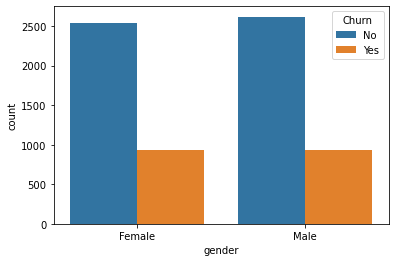

In [9]:
sb.countplot("gender",data=df,hue='Churn')

based on the graph above is seems like the rate at which customers are churning based on gender is equal

C:\Users\changamire_wacho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\changamire_wacho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\changamire_wacho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\changamire_wacho\anaconda3\lib\sit

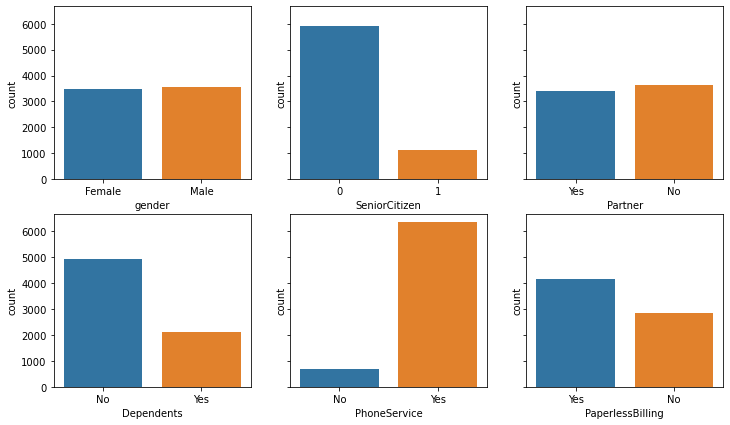

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sb.countplot("gender", data=df, ax=axes[0,0])
sb.countplot("SeniorCitizen", data=df, ax=axes[0,1])
sb.countplot("Partner", data=df, ax=axes[0,2])
sb.countplot("Dependents", data=df, ax=axes[1,0])
sb.countplot("PhoneService", data=df, ax=axes[1,1])
sb.countplot("PaperlessBilling", data=df, ax=axes[1,2])
fig.savefig("inp.png")

Gender distrubution-about half of our customers in the dataset ae male while the other half are female,
Partner — About 50% of the customers have a partner.
Dependent status — Only 30% of the total customers have dependents.
Phone Service — About 90.3% of the customers have phone services.
Paperless Billing— About 59.2% of the customers make paperless billing

# If the marketing team wanted to increase customer retention, to whom should they target their advertisements

As we have just seen above the only 16% of our customers are senior citizens which then means that 84% 
of the remaining are younger people which then answers our quistion that if the marketing team wants to 
increase customer retention they should target the young people according to our analysis

# Which 3 services are contributing to a higher monthly charge and resulting to customers churning?

C:\Users\changamire_wacho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



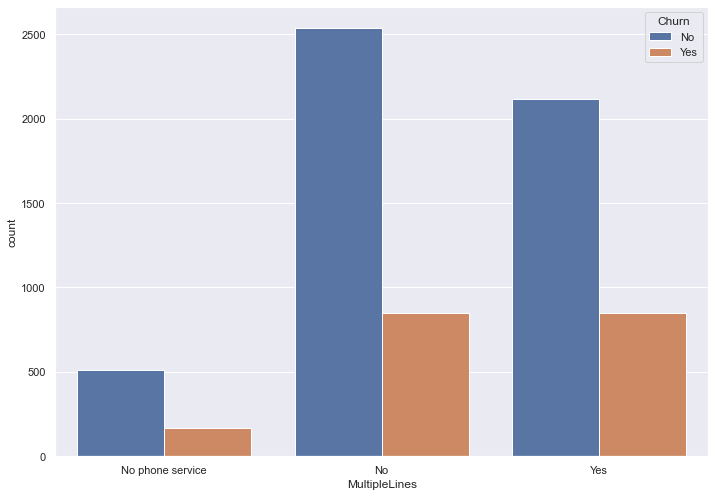

In [30]:
# multiple lines vs churn
sb.countplot('MultipleLines',data=df,hue='Churn')
sb.set(rc={'figure.figsize':(11.7,8.27)})

customers with multipleLines have a slightly higher churn rate

C:\Users\changamire_wacho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



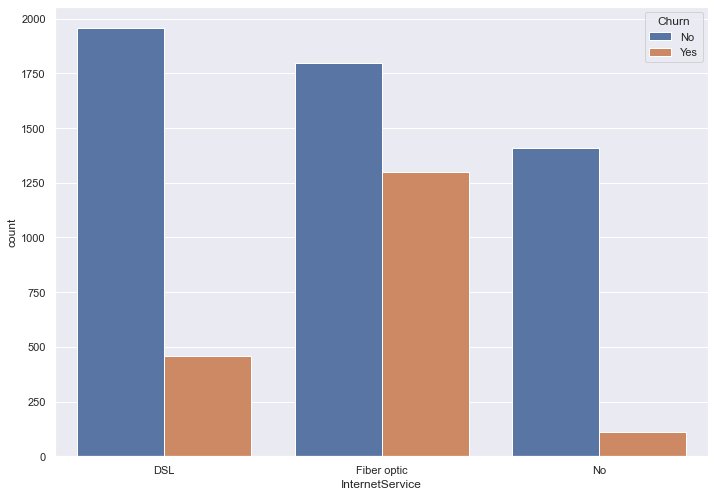

In [19]:
# internet service vs churn
sb.countplot("InternetService", data=df, hue = 'Churn')
sb.set(rc={'figure.figsize':(11.7,8.27)})

Customers with fiber are more probable to churn than those with a DSL connection

C:\Users\changamire_wacho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



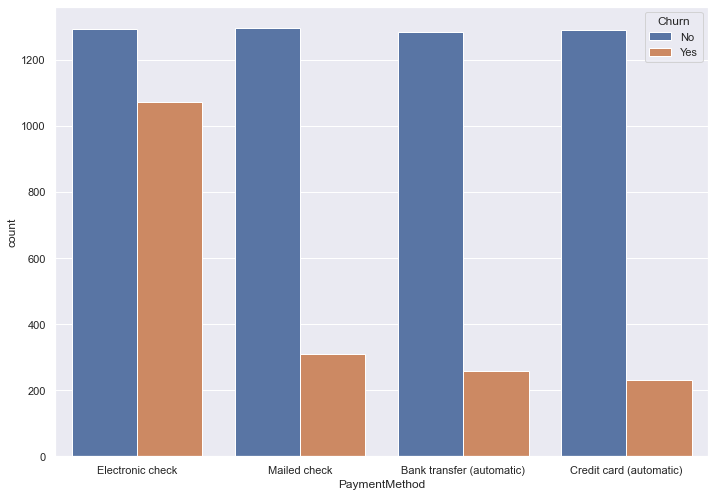

In [18]:
#
sb.countplot("PaymentMethod", data=df, hue = 'Churn')
sb.set(rc={'figure.figsize':(11.7,8.27)})

Electronic Check has most churn in Payment Method

# If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate  to keep customers from churning:

C:\Users\changamire_wacho\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\changamire_wacho\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\changamire_wacho\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for k

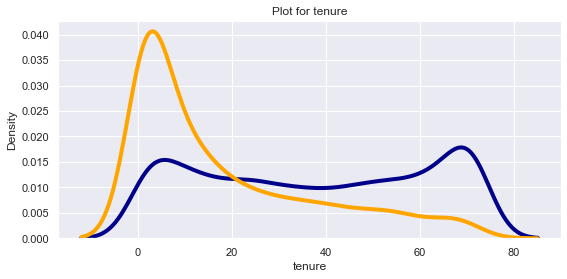

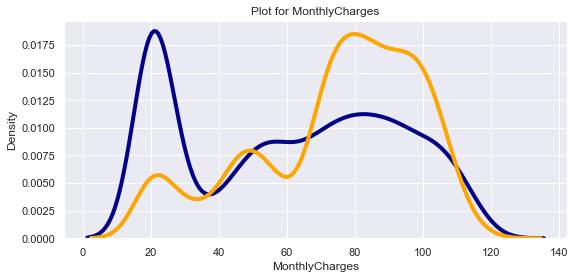

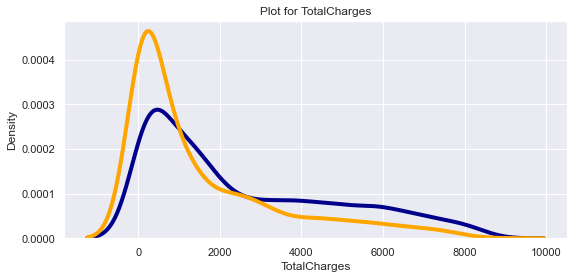

In [33]:
#Numerical features
#There are only three numerical columns: tenure, monthly charges, and total charges.
def kdeplot(feature, hist, kde):
    plt.figure(figsize=(9, 4))
    plt.title("Plot for {}".format(feature))
    ax0 = sb.distplot(df[df['Churn'] == 'No'][feature].dropna(), hist=hist, kde=kde, 
             color = 'darkblue',  label= 'Churn: No',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    ax1 = sb.distplot(df[df['Churn'] == 'Yes'][feature].dropna(), hist=hist, kde=kde, 
             color = 'orange',  label= 'Churn: Yes',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    plt.savefig('kde.png')
kdeplot('tenure', hist = False, kde = True)
kdeplot('MonthlyCharges', hist = False, kde = True)
kdeplot('TotalCharges', hist = False, kde = True)

From the plots above we can conclude that:
Recent Users are more likely to churn
Users with higher MonthlyCharges are also more likely to churn
TotalCharges have a similar property for both

# Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?

C:\Users\changamire_wacho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



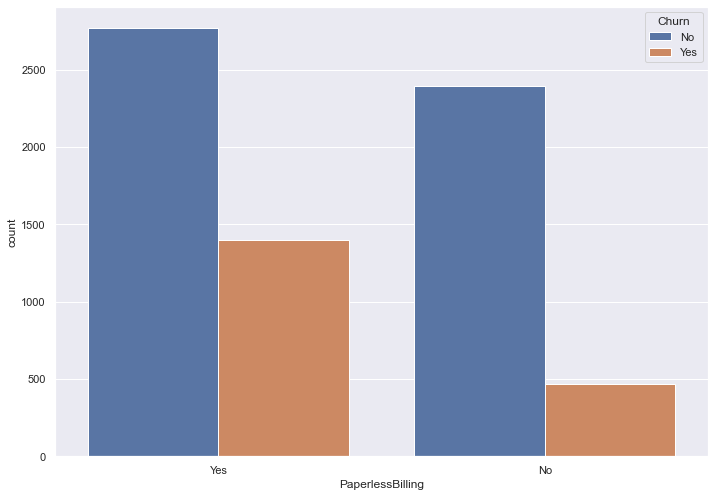

In [21]:
sb.countplot("PaperlessBilling", data=df, hue = 'Churn')
sb.set(rc={'figure.figsize':(11.7,8.27)})

The  company should shoud continue to do paperless billing as technique of keeping their customers 
because as we can see from the graph paperlessbilling techinique results in less churning